### Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [37]:
def analyze_time_series(df, column_name):
    # Step 1: Convert the date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Step 2: Exploratory Data Analysis (EDA)
    print(f"\nAnalysis for {column_name}:")
    print(df.head())
    print(df.describe())
    print(df.info())

    # Step 3: Visualize the data
    plt.figure(figsize=(10, 6))
    plt.plot(df[column_name], label=f'{column_name} Price')
    plt.title(f'{column_name} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Step 4: Decompose the time series
    result = seasonal_decompose(df[column_name], model='multiplicative', period=365)
    result.plot()
    plt.show()

    # Step 5: Check for stationarity
    result_adf = adfuller(df[column_name])
    print(f'ADF Statistic: {result_adf[0]}')
    print(f'p-value: {result_adf[1]}')

    # Step 6: Fit ARIMA model
    model = ARIMA(df[column_name], order=(5, 1, 0))
    model_fit = model.fit()
    print(model_fit.summary())

    # Step 7: Forecasting
    forecast = model_fit.forecast(steps=30)
    plt.figure(figsize=(10, 6))
    plt.plot(df[column_name], label='Historical')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title(f'{column_name} Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [39]:
df=pd.read_csv('portfolio_data.csv')

In [44]:
columns = ['AMZN', 'DPZ', 'BTC', 'NFLX']


Analysis for AMZN:
                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285
              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001
<class 'pandas.core.frame.DataFrame'>
DatetimeInde

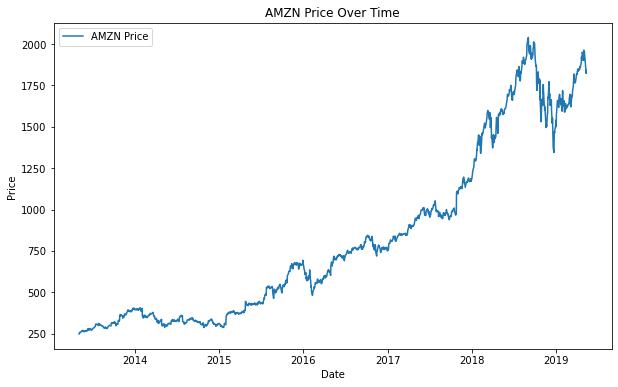

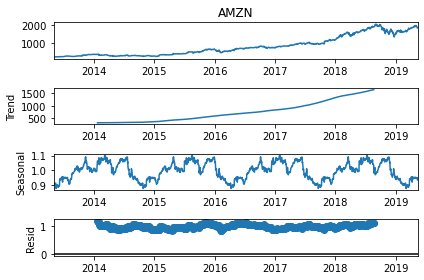

ADF Statistic: 0.553659912330018
p-value: 0.986415949572589


C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AMZN   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6604.610
Date:                Sun, 09 Jun 2024   AIC                          13221.219
Time:                        12:24:04   BIC                          13253.174
Sample:                             0   HQIC                         13233.116
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0235      0.012     -1.931      0.053      -0.047       0.000
ar.L2         -0.0386      0.011     -3.490      0.000      -0.060      -0.017
ar.L3         -0.0146      0.013     -1.139      0.2

C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


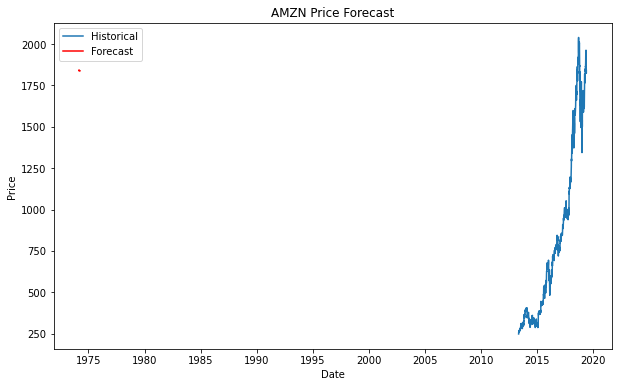


Analysis for DPZ:
                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285
              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex

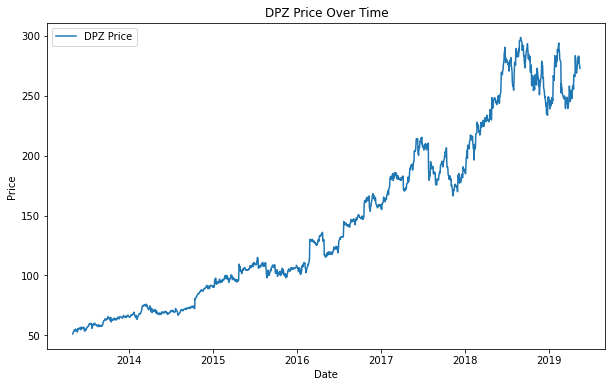

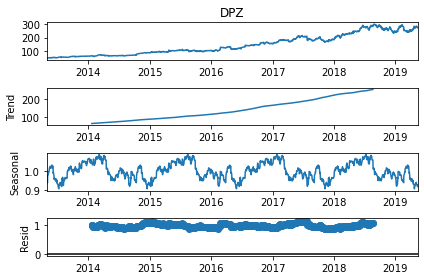

ADF Statistic: -0.27933496068924213
p-value: 0.9283805552655591
                               SARIMAX Results                                
Dep. Variable:                    DPZ   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3707.609
Date:                Sun, 09 Jun 2024   AIC                           7427.217
Time:                        12:24:05   BIC                           7459.172
Sample:                             0   HQIC                          7439.114
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0428      0.017     -2.513      0.012      -0.076      -0.009
ar.L2          0.0063      0.018      0.347      0.728      -0.029 

C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

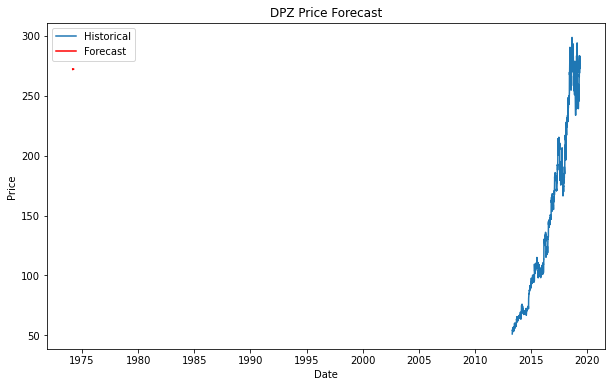


Analysis for BTC:
                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285
              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex

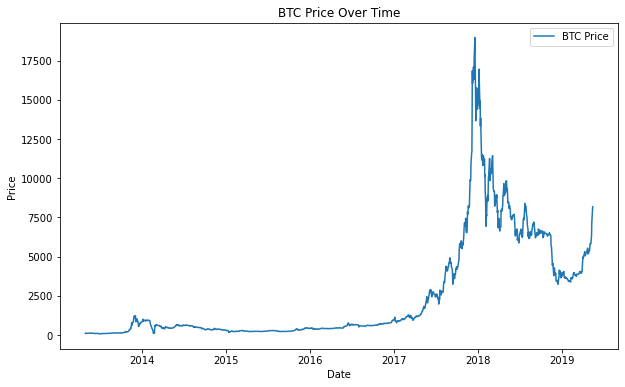

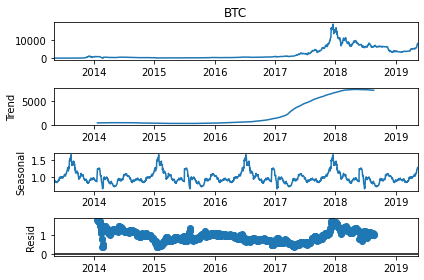

ADF Statistic: -1.3230811198913224
p-value: 0.6185476417504845
                               SARIMAX Results                                
Dep. Variable:                    BTC   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10545.833
Date:                Sun, 09 Jun 2024   AIC                          21103.666
Time:                        12:24:06   BIC                          21135.621
Sample:                             0   HQIC                         21115.563
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0297      0.007     -4.035      0.000      -0.044      -0.015
ar.L2          0.0837      0.009      9.472      0.000       0.066  

C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

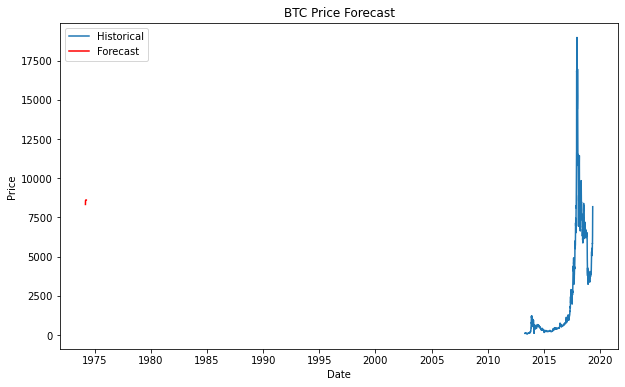


Analysis for NFLX:
                  AMZN        DPZ         BTC       NFLX
Date                                                    
2013-05-01  248.229996  51.190983  106.250000  30.415714
2013-05-02  252.550003  51.987320   98.099998  30.641428
2013-05-03  258.049988  52.446388  112.900002  30.492857
2013-05-06  255.720001  53.205257  109.599998  30.098572
2013-05-07  257.730011  54.151505  113.199997  29.464285
              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001
<class 'pandas.core.frame.DataFrame'>
DatetimeInde

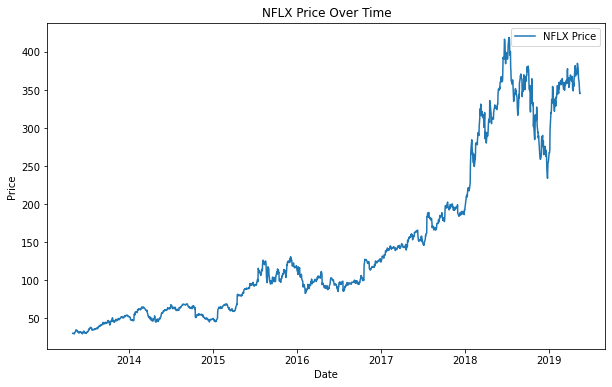

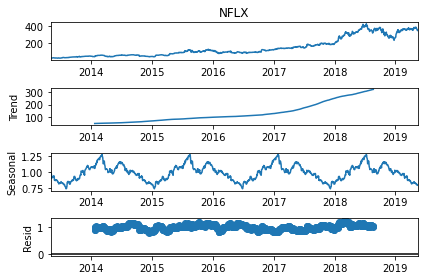

ADF Statistic: -0.18415819336089054
p-value: 0.9403837629187612
                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4502.287
Date:                Sun, 09 Jun 2024   AIC                           9016.575
Time:                        12:24:07   BIC                           9048.530
Sample:                             0   HQIC                          9028.472
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0089      0.014      0.620      0.536      -0.019       0.037
ar.L2          0.0218      0.015      1.464      0.143      -0.007 

C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bhavana padisetty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

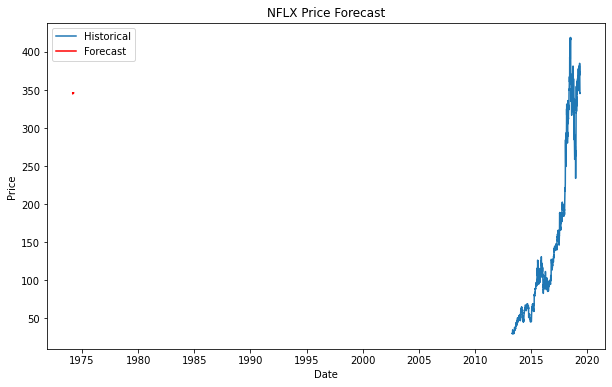

In [45]:
# Analyze each column
for column in columns:
    analyze_time_series(df.copy(), column)